In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os, shutil
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
ORIGINAL_DATASET_DIR = '/home/saileshg/sailspace/dev/Projects/GitProjects/Self/Learn/DL_With_Py_Chollet/Originals/cats_dogs_all/train'
BASE_DIR = 'data/cats_dogs_all'
MODEL_EXPORT_DIR = BASE_DIR
CAT_CLASS = 'cat'
DOG_CLASS = 'dog'
IM_DIMS = (150,150,3)

In [3]:
def generate_folder_structure(src_dir, class_name, base_dir='./data', train_size=1000, test_val_size=500):
    
    if not os.path.lexists(base_dir):
        os.mkdir(base_dir)

    for dir_name in ['train', 'validation', 'test']:
        
        sub_dir = os.path.join(base_dir, dir_name)
        if not os.path.lexists(sub_dir):
            os.mkdir(sub_dir)
        
        sub_class_dir = os.path.join(sub_dir,class_name)
        if not os.path.lexists(sub_class_dir):
            os.mkdir(sub_class_dir)
        
        if dir_name == 'train':
            fnames= [class_name+'.{}.jpg'.format(i) for i in range(train_size)]
        elif dir_name == 'validation':
            fnames= [class_name+'.{}.jpg'.format(i) for i in range(train_size, train_size+test_val_size)]
        else:
            fnames= [class_name+'.{}.jpg'.format(i) for i in range(train_size+test_val_size, train_size+(2*test_val_size))]
        
        for fname in fnames:
            src = os.path.join(src_dir, fname)
            dst = os.path.join(sub_class_dir, fname)
            shutil.copyfile(src, dst)
        
        print('Total images in {} - {} directory: '.format(dir_name, sub_class_dir), len(os.listdir(sub_class_dir)))
    return base_dir
        
    

In [4]:
base_dir_folder = generate_folder_structure(src_dir=ORIGINAL_DATASET_DIR, class_name=CAT_CLASS, base_dir=BASE_DIR)
base_dir_folder = generate_folder_structure(src_dir=ORIGINAL_DATASET_DIR, class_name=DOG_CLASS, base_dir=BASE_DIR)
print("Base folder: ", base_dir_folder)

Total images in train - data/cats_dogs_all/train/cat directory:  1000
Total images in validation - data/cats_dogs_all/validation/cat directory:  500
Total images in test - data/cats_dogs_all/test/cat directory:  500
Total images in train - data/cats_dogs_all/train/dog directory:  1000
Total images in validation - data/cats_dogs_all/validation/dog directory:  500
Total images in test - data/cats_dogs_all/test/dog directory:  500
Base folder:  data/cats_dogs_all


In [5]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=IM_DIMS))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
model.compile(optimizer=Adam(lr=0.0002),loss='binary_crossentropy',metrics=['acc'])

In [7]:
train_datagen = ImageDataGenerator(featurewise_center=False,
                                   samplewise_center=False,
                                   featurewise_std_normalization=False,
                                   samplewise_std_normalization=False,
                                   zca_whitening=False,
                                   zca_epsilon=1e-06,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range=None,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=0.0,
                                   fill_mode='nearest',
                                   cval=0.0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                   preprocessing_function=None,
                                   data_format=None,
                                   validation_split=0.0)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_dir_folder = os.path.join(base_dir_folder,'train')
validation_dir_folder = os.path.join(base_dir_folder,'validation')

train_generator = train_datagen.flow_from_directory(
    train_dir_folder,
    target_size=(150, 150),
    color_mode='rgb',
    classes=None,
    class_mode='binary', # for binary_crossentropy
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir_folder,
    target_size=(150, 150),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=5, 
    verbose=1, 
    callbacks=None, 
    validation_data=validation_generator, 
    validation_steps=50, 
    class_weight=None, 
    max_queue_size=10, 
    workers=1, 
    use_multiprocessing=False, 
    shuffle=True, 
    initial_epoch=0)

Epoch 1/5
100/100 [==============================] - 206s 2s/step - loss: 0.6924 - acc: 0.5009 - val_loss: 0.6862 - val_acc: 0.5840
Epoch 2/5
100/100 [==============================] - 208s 2s/step - loss: 0.6732 - acc: 0.5762 - val_loss: 0.6295 - val_acc: 0.6390
Epoch 3/5
100/100 [==============================] - 210s 2s/step - loss: 0.6653 - acc: 0.5884 - val_loss: 0.6234 - val_acc: 0.6440
Epoch 4/5
100/100 [==============================] - 202s 2s/step - loss: 0.6235 - acc: 0.6472 - val_loss: 0.5968 - val_acc: 0.6580
Epoch 5/5
100/100 [==============================] - 184s 2s/step - loss: 0.6040 - acc: 0.6769 - val_loss: 0.5742 - val_acc: 0.6900


In [10]:
if not os.path.lexists(MODEL_EXPORT_DIR):
    os.mkdir(MODEL_EXPORT_DIR)
    
model.save(MODEL_EXPORT_DIR+r'cats_dogs_classifier_v1.h5', overwrite=True, include_optimizer=True)

In [12]:
print("History items: ", history.history.items())

History items:  dict_items([('val_loss', [0.6862083253860474, 0.6294986162185668, 0.623411940574646, 0.5968391847610474, 0.5741899089813233]), ('val_acc', [0.584, 0.639, 0.644, 0.658, 0.69]), ('loss', [0.6924623582098219, 0.6738040365956046, 0.6654378517189218, 0.6230240311454888, 0.6037654885739991]), ('acc', [0.4996843434343434, 0.5754419191919192, 0.5885678391959799, 0.6482412060301508, 0.6767676767676768])])


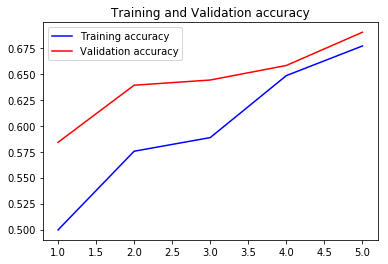

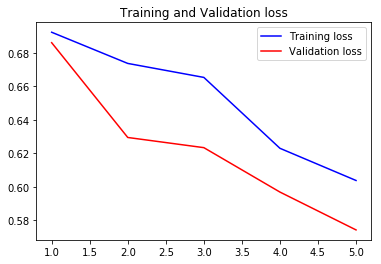

In [18]:
# Plot Training/Validation accuracy

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)

plt.plot(epochs,accuracy,'b',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation accuracy')
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title("Training and Validation loss")
plt.legend()